# EXPLORATORY DATA ANALYSIS - RETAIL SUPERSTORE

## Data Cleaning and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
df.shape

(9994, 13)

### Step-1 : Check for Duplicates

In [8]:
df.duplicated().sum()

17

### Step-2 : Remove duplicate rows

In [9]:
#Remove duplicate rows

df = df.drop_duplicates()

In [10]:
df.shape

(9977, 13)

### Step-3 : Overview of the columns and thier type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 779.5+ KB


### Step-4 :Statistical analysis on the quantitative columns

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### Step-5 : Check for missing values

In [13]:
df.isnull().sum() #There is no missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Step-6 : Drop irrelevant features

In [14]:
df.drop(['Postal Code'],axis = 1,inplace = True)

### What is the highest sales?

In [15]:
df['Sales'].max()

22638.48

### Which city has the highest Sales?

In [16]:
df[df['Sales'] == df['Sales'].max()]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,South,Technology,Machines,22638.48,6,0.5,-1811.0784


## Q1) What is the higest profit earned by each segment?

In [17]:
high_pr = df.pivot_table(index = 'Segment',values = ['Profit'],aggfunc = np.max)
high_pr

,Profit
Segment,
Consumer,6719.9808
Corporate,8399.9760
Home Office,3919.9888


## Q2) Which segment has highest profit?

In [18]:
high_pr[high_pr['Profit'] == high_pr.Profit.max()]

,Profit
Segment,
Corporate,8399.976


### Pie-chart Visualization of Profit in each Segment.

<AxesSubplot:ylabel='Profit'>

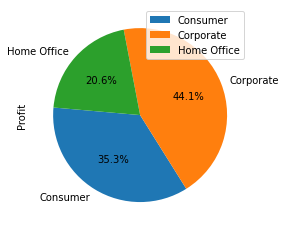

In [19]:
high_pr.plot(y ='Profit',kind = 'pie', startangle = 175, autopct = '%1.1f%%')

##### The above pie-chart dipicts the Profits generated in terms of total percentage(%).
##### The Corporate segment holds the highest position in earning 44.1% of total profits.
##### The Consumer segment generated around 35.3% of total profits and holds the second position.
##### The Home Office segment has the lowest percentage in genarating profits which is 20.6%. 

## Q3) What is the highest sales generated by each segment?

In [20]:
high_sales = df.pivot_table(index = 'Segment',values = ['Sales'],aggfunc = np.max)
high_sales

,Sales
Segment,
Consumer,13999.96
Corporate,17499.95
Home Office,22638.48


## Q4) Which segment has highest Sales?

In [21]:
high_sales[high_sales['Sales'] == high_sales.Sales.max()]

,Sales
Segment,
Home Office,22638.48


### Pie-chart Visualization of Sales in each Segment.

<AxesSubplot:ylabel='Sales'>

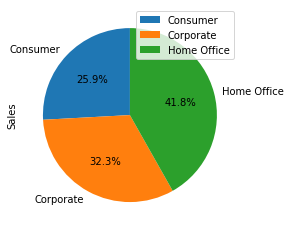

In [22]:
high_sales.plot(y ='Sales',kind = 'pie', startangle = 90, autopct = '%1.1f%%')

##### The above pie-chart dipicts the Sales generated in terms of total percentage(%).
##### The Home Office segment holds the highest position in earning 41.8% of total sales.
##### The Corporate segment generated around 32.3% of total sales and holds the second position.
##### The Consumer segment has the lowest percentage in genarating sales which is 25.9%. 

### Saving Dataframe to csv

In [23]:
df.to_csv('SampleSuperStore.csv',header = True,index = False)